# Importing required Libraries

In [1]:
#--importing required libraries-----------
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
from collections import Counter
import random as rn

## Reading the news dataset input file

In [2]:
data = pd.ExcelFile('News Dataset.xlsx')
df_nd = data.parse("train")


In [3]:
# reading first 10 rows
df_nd.head(10)

,text,category,sentiment,offensive
0,കൊച്ചി ചെരുപ്പ് വിതരണ കേന്ദ്രത്തിലെ തീപിടിത്തം...,business,negative,Offensive
1,ഈ​​​സ്റ്റേ​​​ണ്‍ ക​​​റി പൗ​​​ഡ​​​റി​​​ന് പു​​​...,business,positive,Not Offensive
2,ശ്രീശാന്തിന്റെ ആജീവനാന്ത വിലക്ക് പിന്‍വലിച്ചു,sports,positive,Not Offensive
3,റയല്‍ മാഡ്രിഡിനെ ഞെട്ടിച്ച യുവതാരം ബ്രസീല്‍ ടീ...,sports,positive,Not Offensive
4,"എനിക്ക് ശ്രീനിവാസന്‍ ആകേണ്ട, ലോഹിതദാസ് മതി : ക...",entertainment,neutral,Offensive
5,"മുല്ലപ്പൂ വിപ്ലവം ഇന്നു മുതല്‍, തിയറ്റര്‍ ലിസ്...",entertainment,positive,NaN
6,'അനാന്‍' ചിത്രത്തിന്‍റെ പുതിയ പോസ്റ്റര്‍ പുറത്...,entertainment,positive,NaN
7,മുകേഷ് അംബാനി കുതിക്കുന്നു,business,positive,NaN
8,കിസാന്‍ സമ്മാന്‍ നിധിക്കായി സംസ്ഥാനത്തെ കൃഷിഭവ...,business,positive,NaN
9,\nഒടുവില്‍ ടി വി ചന്ദ്രന്‍ അയ്യപ്പനോടുള്ള വാക്...,entertainment,positive,NaN


In [4]:
# Number of rows and columns
nRow, nCol = df_nd.shape
print(f'There are {nRow} rows and {nCol} columns in news dataset')

There are 5036 rows and 4 columns in news dataset


## Reading youtube comment dataset

In [5]:
df_yc = pd.read_csv('youtube_comments_dataset.csv')

# reading first 10 rows
df_yc.head(10)

,text,category,sentiment,offensive
0,ഇത്തരം വനജീവികളെ വീട്ടിൽ വളർത്തുന്നവരോട് പറയ...,Pets_and_Animals,negative,0
1,ജീവിതത്തിൽ പലപ്പോഴും തോന്നിട്ടുണ്ട് സുഹൃത്തുക...,Pets_and_Animals,positive,0
2,ഈ പൂച്ച കുട്ടിയെ ഞങ്ങളാ വാങ്ങിയത് സുറുമി എന്ന ...,Pets_and_Animals,positive,0
3,അവന്റെ കണ്ണുകളിൽ അന്നു കണ്ട ദയനീയത കണ്ടവർക്ക് ...,Pets_and_Animals,positive,0
4,പൊള്ളിയാലോ ഗ്രീൻ ഗപ്പി ഫുഡ് ഈ വിഡിയോ ഇട്ട ...,Pets_and_Animals,positive,0
5,ജാസ്മിനിൽ പൂർണമായി ആ വൈരാഗ്യം അവസാനിക്കും എന്...,Pets_and_Animals,negative,0
6,പൊന്നേട്ടൻ വിശേഷങ്ങൾ നന്നായി പോകുന്നുണ്ട് ട്ടോ...,Pets_and_Animals,positive,0
7,ഗുരുവായൂർ കണ്ണന്റെ ഇന്ദ്രസേൻ ഗജരത്നം പത്മനാഭന്...,Pets_and_Animals,positive,0
8,ചെരിഞ്ഞപ്പോൾ ആദരാഞ്ജലികൾ ഇടാൻ എല്ലാവരുമുണ്ട് ഇ...,Pets_and_Animals,negative,0
9,ടീം നോക്കാതെ ക്രിക്കറ്റ് കണ്ടിരുന്ന കാലം 260 പ...,Sports,positive,0


In [6]:
# Number of rows and columns
nRow, nCol = df_yc.shape
print(f'There are {nRow} rows and {nCol} columns in youtube comments dataset')

There are 6105 rows and 4 columns in youtube comments dataset


### Plotting the sentiments in the news and youtube comment dataset

Text(0.5, 0, 'Sentiments')

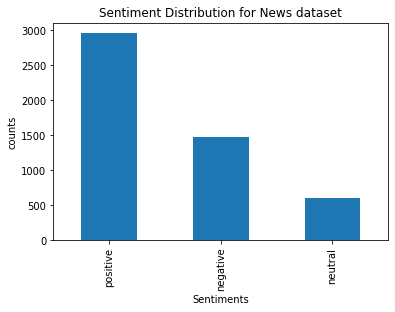

In [7]:
plt.title("Sentiment Distribution for News dataset")
plt.ylabel('counts')
df_nd['sentiment'].value_counts().plot.bar()
plt.xlabel('Sentiments')

In [8]:
df_nd.sentiment.value_counts()

positive    2962
negative    1473
neutral      601
Name: sentiment, dtype: int64

Text(0.5, 0, 'Sentiments')

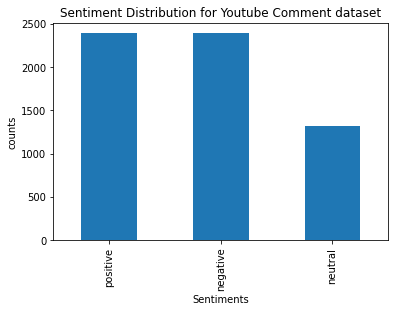

In [9]:
plt.title("Sentiment Distribution for Youtube Comment dataset")
plt.ylabel('counts')
df_yc['sentiment'].value_counts().plot.bar()
plt.xlabel('Sentiments')

In [10]:
df_yc.sentiment.value_counts()

positive    2394
negative    2391
neutral     1320
Name: sentiment, dtype: int64

### Appending the neutral values from youtube comments to the news dataset

In [11]:
df_neutral_yc=df_yc.loc[df_yc['sentiment'] == 'neutral']

In [12]:
df = df_nd.append(df_neutral_yc.head(800),ignore_index=True)

In [13]:
# Number of rows and columns
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns in youtube comments dataset')

There are 5836 rows and 4 columns in youtube comments dataset


In [14]:
df.head(10)

,text,category,sentiment,offensive
0,കൊച്ചി ചെരുപ്പ് വിതരണ കേന്ദ്രത്തിലെ തീപിടിത്തം...,business,negative,Offensive
1,ഈ​​​സ്റ്റേ​​​ണ്‍ ക​​​റി പൗ​​​ഡ​​​റി​​​ന് പു​​​...,business,positive,Not Offensive
2,ശ്രീശാന്തിന്റെ ആജീവനാന്ത വിലക്ക് പിന്‍വലിച്ചു,sports,positive,Not Offensive
3,റയല്‍ മാഡ്രിഡിനെ ഞെട്ടിച്ച യുവതാരം ബ്രസീല്‍ ടീ...,sports,positive,Not Offensive
4,"എനിക്ക് ശ്രീനിവാസന്‍ ആകേണ്ട, ലോഹിതദാസ് മതി : ക...",entertainment,neutral,Offensive
5,"മുല്ലപ്പൂ വിപ്ലവം ഇന്നു മുതല്‍, തിയറ്റര്‍ ലിസ്...",entertainment,positive,NaN
6,'അനാന്‍' ചിത്രത്തിന്‍റെ പുതിയ പോസ്റ്റര്‍ പുറത്...,entertainment,positive,NaN
7,മുകേഷ് അംബാനി കുതിക്കുന്നു,business,positive,NaN
8,കിസാന്‍ സമ്മാന്‍ നിധിക്കായി സംസ്ഥാനത്തെ കൃഷിഭവ...,business,positive,NaN
9,\nഒടുവില്‍ ടി വി ചന്ദ്രന്‍ അയ്യപ്പനോടുള്ള വാക്...,entertainment,positive,NaN


In [15]:
df['sentiment']

0       negative
1       positive
2       positive
3       positive
4        neutral
          ...   
5831     neutral
5832     neutral
5833     neutral
5834     neutral
5835     neutral
Name: sentiment, Length: 5836, dtype: object

Text(0.5, 0, 'Sentiments')

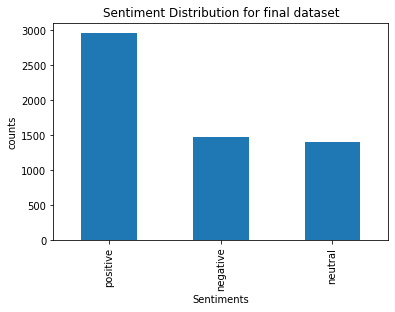

In [16]:
plt.title("Sentiment Distribution for final dataset")
plt.ylabel('counts')
df['sentiment'].value_counts().plot.bar()
plt.xlabel('Sentiments')

In [17]:
df.sentiment.value_counts()

positive    2962
negative    1473
neutral     1401
Name: sentiment, dtype: int64

In [18]:
# Number of rows and columns
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns in final dataset')

There are 5836 rows and 4 columns in final dataset


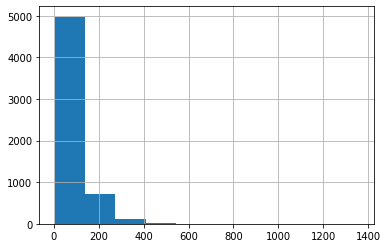

count    5836.000000
mean       95.149589
std        68.139708
min         4.000000
25%        57.000000
50%        78.000000
75%       107.000000
max      1358.000000
dtype: float64

In [19]:
text_len = [len(x) for x in df['text']]
pd.Series(text_len).hist()
plt.show()
pd.Series(text_len).describe()

### Number of words

In [20]:
df['number_of_words'] = [len(tw.split()) for tw in df.text]
df

,text,category,sentiment,offensive,number_of_words
0,കൊച്ചി ചെരുപ്പ് വിതരണ കേന്ദ്രത്തിലെ തീപിടിത്തം...,business,negative,Offensive,10
1,ഈ​​​സ്റ്റേ​​​ണ്‍ ക​​​റി പൗ​​​ഡ​​​റി​​​ന് പു​​​...,business,positive,Not Offensive,14
2,ശ്രീശാന്തിന്റെ ആജീവനാന്ത വിലക്ക് പിന്‍വലിച്ചു,sports,positive,Not Offensive,4
3,റയല്‍ മാഡ്രിഡിനെ ഞെട്ടിച്ച യുവതാരം ബ്രസീല്‍ ടീ...,sports,positive,Not Offensive,6
4,"എനിക്ക് ശ്രീനിവാസന്‍ ആകേണ്ട, ലോഹിതദാസ് മതി : ക...",entertainment,neutral,Offensive,11
...,...,...,...,...,...
5831,സുമ്മുൻ ബുക് മുൻ ഉംയുൻ ഫഹും ലായർജി ഊൻ (ദുൽ മത്...,Education,neutral,0,10
5832,സുധാകരനും സതീശനും മുട്ടനാടുകളെ രക്ഷ പെടുത്താൻ ...,News_and_Politics,neutral,0,8
5833,സുകന്യ അക്കൌണ്ടിന്റെ പ്രായം പറഞ്ഞില്ല,News_and_Politics,neutral,0,4
5834,ഷൈനപ്പൻ അശ്വതിപ്രീന തിരുവാതിര അനുജ രേവതി ദിയ പ...,Science_and_Technology,neutral,0,10


In [21]:
#counting the number of unique words in the corpora

def counter_word(text):
    print("Started counting words")
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    print("Finished counting words")
    return count

In [22]:
no_of_words= counter_word(df['text'])
print(len(no_of_words))

Started counting words
Finished counting words
24983


Importing Rachana font for printing Malayalam words in plot

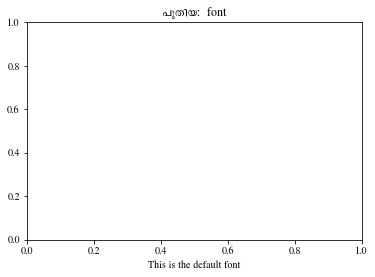

In [23]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib import rcParams

# download and save any malayalam font file in current directory
font_path = 'Rachana.ttf'  
font_manager.fontManager.addfont(font_path)
rcParams['font.family'] = 'Rachana'
fig, ax = plt.subplots()

ax.set_title(f'പുതിയ:  font')
ax.set_xlabel('This is the default font')
plt.show()

Filtering the most common words which are considered as stop words.

In [24]:
from collections import Counter
mystopwords = ['ഒരു', 'ഈ',  'ആണ്', 'വളരെ', 'ഞാൻ', 'തന്നെ', 'ആ', 'വീഡിയോ',  'എന്റെ', 'നമ്മുടെ', 'എല്ലാ', 'അത്', 'എന്ന', 'കൊണ്ട്', 'ഉള്ള', 'ഇത്',  'എല്ലാം', 
               'എനിക്ക്', 'ഓരോ',  'പിന്നെ',  'ഒക്കെ',  'നിങ്ങൾ', 'വേണ്ടി', 'മാത്രം', 'നിങ്ങളുടെ', 'നിന്നും', 'കൂടെ', 'ഏറ്റവും', 'ഇങ്ങനെ', 'അവരുടെ',  'കാരണം', 'ഇല്ല', 
               'കൂടുതൽ', '-', 'എല്ലാവർക്കും', 'അവർ', 'പോലും', 'വീണ്ടും', 'എന്നു', 'ചെയ്യാൻ', 'അവിടെ', 'സ്വന്തം', 'അതിന്റെ', 'ഇവിടെ', 'അങ്ങനെ',  'എല്ലാവരും', 
               'ഞങ്ങൾ',  'നമ്മൾ', 'നമുക്ക്',  'പക്ഷെ', 'നീ',  'പക്ഷേ', 'എന്നെ',  'എന്നാൽ',  'ആരും', 'അതിൽ',  'അല്ല', 'ശേഷം',  'എന്ത്', 'താങ്കൾ', 'എങ്ങനെ', 'അതാണ്',
               'നിങ്ങൾക്ക്', 'അവർക്ക്',  'ഏത്',  'മറ്റു', 'അവരെ','നല്ല', 'ഉണ്ട്','എന്ന്', 'പോലെ', 'ആയി', 'കണ്ടു', 'ഒന്നും', 'നിന്ന്', 'വരെ', 'ചെയ്തു', 'വന്നു', 'ആയിരുന്നു', 
               'അടുത്ത', 'ചെയ്യുന്ന', 'പല', 'വേറെ', 'ചില', 'മതി', 'ഒരിക്കലും', 'കുറിച്ച്', 'പറഞ്ഞ', 'വന്ന', 'താങ്കളുടെ', 'ചേട്ടൻ', 'ചേട്ടാ', 'ചെയ്ത', 'നൽകി', 'കണ്ട്', 'എൻറെ', 
               'വെച്ച്', 'യും', 'നിങ്ങളെ', 'പറഞ്ഞത്', 'മാത്രമേ', 'അവൻ', 'എന്തെങ്കിലും', 'എന്നത്', 'എന്താണ്', 'കഴിഞ്ഞു', 'അറിയാം', 'അതു', 'മാത്രമാണ്', 'അതിനെ', 'ചെയ്ത്',
               'ഇവർ', 'സ്വയം', 'മുൻപ്', 'ഉള്ളത്', 'പേര്','ഇപ്പോൾ', 'ഇനി', 'ഇനിയും', 'ഇനി' , 'ഇപ്പോൾ' , 'എങ്കിൽ', 'അപ്പോൾ', 'അല്ലെങ്കിൽ', 'ഇതിൽ', 'ഇതൊക്കെ', 'ഇത്രയും', 
               'ഇതിന്റെ', 'ഞങ്ങളുടെ', 'ഇതാണ്' , 'പിന്നീട്']
# mystopwords = set(mystopwords)

stop_words= ['.', ',', '"', "'", ':', ';', '(', ')', '[', ']', '{', '}','-']

mystopwords = mystopwords + stop_words
mystopwords = set(mystopwords)

text =" ".join(df.text)
f_words = filter(lambda x : x not in mystopwords, text.split())



### Positive + Negative + Neutral

<BarContainer object of 20 artists>

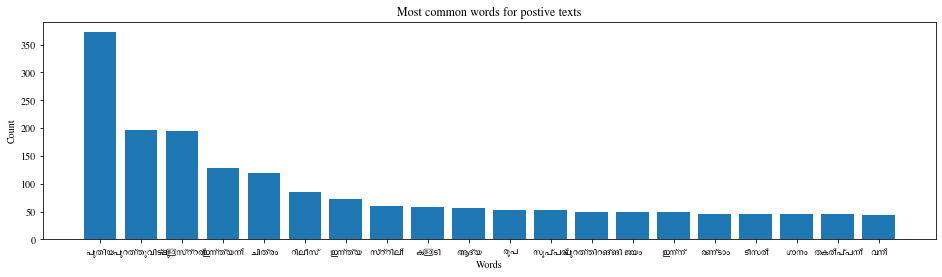

In [25]:
text_pos =" ".join(df[df['sentiment']=="positive"].text)
f_words = filter(lambda x : x not in mystopwords, text_pos.split())
counted_words = Counter(f_words)
words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)

# plt.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']   

plt.figure(figsize = (16, 4))
plt.title('Most common words for postive texts')
plt.xlabel('Words')
plt.ylabel('Count')
plt.bar(words, counts)
# matplotlib.rc('font', family='Your Font')

<BarContainer object of 20 artists>

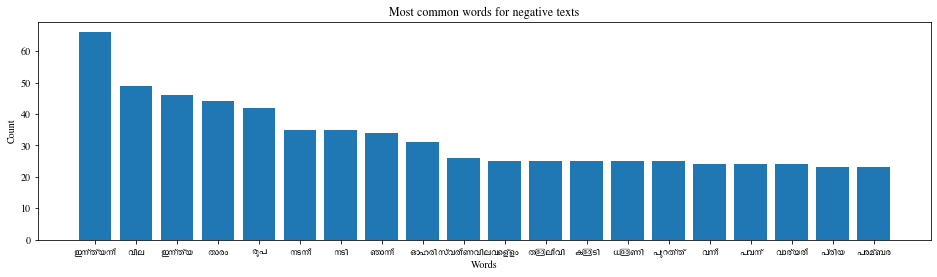

In [26]:
text_neg =" ".join(df[df['sentiment']=="negative"].text)
f_words = filter(lambda x : x not in mystopwords, text_neg.split())
counted_words = Counter(f_words)
words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)

# plt.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']   

plt.figure(figsize = (16, 4))
plt.title('Most common words for negative texts')
plt.xlabel('Words')
plt.ylabel('Count')
plt.bar(words, counts)
# matplotlib.rc('font', family='Your Font')

<BarContainer object of 20 artists>

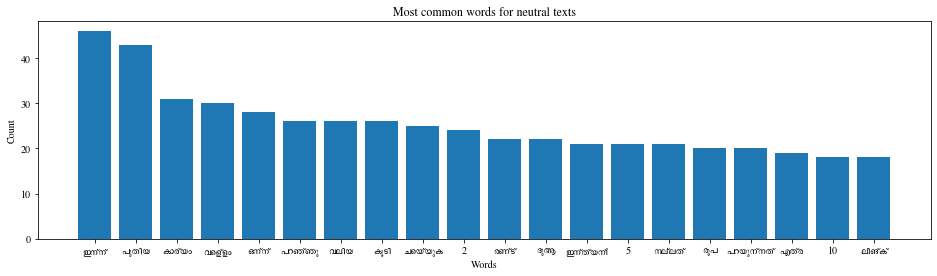

In [27]:
text_neg =" ".join(df[df['sentiment']=="neutral"].text)
f_words = filter(lambda x : x not in mystopwords, text_neg.split())
counted_words = Counter(f_words)
words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)

# plt.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']   

plt.figure(figsize = (16, 4))
plt.title('Most common words for neutral texts')
plt.xlabel('Words')
plt.ylabel('Count')
plt.bar(words, counts)
# matplotlib.rc('font', family='Your Font')

# Installing mlmorph for stemming 

In [28]:
#installing mlmorph
! pip install mlmorph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 8.2 MB/s 
     |████████████████████████████████| 365 kB 66.1 MB/s 
  Created wheel for mlmorph: filename=mlmorph-1.3.5-py3-none-any.whl size=5646002 sha256=34ed852296ab6cce63fbcd3665cb90207ceb9b4caa676c7dbd29564503b6470f
  Stored in directory: /root/.cache/pip/wheels/d2/8a/c6/b8acaed490e36c02f00f9adb345eb50a5c6124a15037db7119
Successfully built mlmorph


Example of mlmorph with some malayalam words

In [29]:
from mlmorph import Analyser
analyser = Analyser()
import sfst

analyser.analyse("ആലാപനം")

[('ആലാപനം<n>', 123),
 ('ആൽ<n><adj>ആപനം<n>', 265),
 ('ആൽ<n><coordinative>ആപനം<n>', 265)]

In [30]:
analyser.analyse("കേന്ദ്രത്തിലെ")

[('കേന്ദ്രം<n><locative>എ<indeclinable>', 325)]

In [31]:
analyser.analyse("പൊളിച്ചു")

[('പൊളിയുക<v><causative-voice><past>', 247)]

#Reading text calling from dataset 

In [32]:
#Getting all the news to string from padas dataframe
string_lst = df["text"].values.tolist()

Splitting the string to words of list

In [33]:
# function for splitting the string
def string_to_list(string_lst):
  str_list_stem=[]
  for string in string_lst:
    split_string_list=string.split()
    str_list_stem.append(split_string_list)
  return str_list_stem

In [34]:
str_list_stem=string_to_list(string_lst)

In [35]:

print('Length of list which are splitted into words:',len(str_list_stem))


Length of list which are splitted into words: 5836


#Function for stemming

In [36]:
# function for stemming
def stemmer(string_lst):

  for words in string_lst:
    stem_words=analyser.analyse(words)
    # print(stem_words)

    if  not stem_words:
      stem_list.append(words)
    else:
      pat = re.compile(r'[^\u0d00-\u0d7f\s]',re.UNICODE)
      stem_list.append(re.sub(pat, "", stem_words[0][0]).strip())

  return stem_list

In [ ]:
# for loop for entire dataframe
final_stem_list=[]
for str in str_list_stem:
  # print('String is',str)
  stem_list=[]
  stem=stemmer(str)
  # print('stemmed list is',stem)
  final_stem_list.append(stem)


In [ ]:
print('Length of stemmed list: ',len(final_stem_list))

In [ ]:
final_stem_list

In [ ]:
#All this for reproducibility
np.random.seed(1)
rn.seed(1)

Function for splitting data in to train and test with all classes

In [38]:
def testtrainsplit(df,frac=0.20):

  from sklearn.model_selection import train_test_split

  trainx = [] 

  testx = []

  for i in ['positive','negative','neutral']:

     tdf = df[df['sentiment'] == i]

     t1, t2 = train_test_split(tdf, test_size=frac, random_state=0)

     num=len(tdf)

     trainx.append(t1)

     testx.append(t2)

  return pd.concat(trainx),pd.concat(testx)

In [39]:
train_df,test_df=testtrainsplit(df,frac=0.20)

In [40]:
print("Number of training data ", train_df.shape[0])
print("Number of testing data: ", test_df.shape[0])

Number of training data  4667
Number of testing data:  1169


In [41]:
train_df

,text,category,sentiment,offensive,number_of_words
233,"ശ്രീശാന്തിന് ആശ്വാസം, വിലക്ക് പിന്‍വലിച്ചു",sports,positive,NaN,4
2623,പുതിയ കളികളുമായി പത്മനാഭന്റെ മണ്ണിലേക്ക് 'പട്ട...,entertainment,positive,NaN,11
2589,സിനിമയ്ക്ക് പുറമേ മോദിയുടെ ജീവിതകഥ വെബ് സീരീസാ...,entertainment,positive,NaN,7
4096,'നീര്‍മാതളം പൂത്തകാലം' ചിത്രത്തിലെ പുതിയ വീഡിയ...,entertainment,positive,NaN,7
1942,\nമൊഹാലി ഏകദിനം: പ്രതീക്ഷ കൈവിടാതെ ഓസീസ്; ഹാന്...,sports,positive,NaN,7
...,...,...,...,...,...
5198,ശരിയാണ് പറഞ്ഞത് കാട്ടാനകളുടെ എണ്ണം കൂടുമ്പോൾ ...,Autos_and_Vehicles,neutral,0,31
5270,എടാ വിമാനം അവിടേക്ക് സർവീസ് നടത്തിയാലല്ലേ ഇവിട...,People_and_Blogs,neutral,0,9
5651,അസ്സലാമുഅലൈക്കും വറഹ്മതുള്ളാഹിവബറകാതുഹു ഷ ഹമാര...,Education,neutral,0,23
4676,കുമ്ബളങ്ങി നെറ്റസിലെ ഫ്രാങ്കി എന്ന കഥാപാത്രത്ത...,entertainment,neutral,NaN,13


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


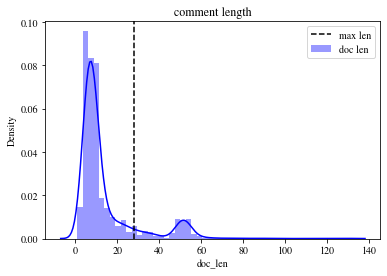

In [43]:
y_train = train_df["sentiment"].tolist()
y_test = test_df["sentiment"].tolist()
train_df['doc_len'] = train_df['text'].apply(lambda words: len(words.split(" ")))
max_seq_len = np.round(train_df['doc_len'].mean() + train_df['doc_len'].std()).astype(int)

import seaborn as sns
sns.distplot(train_df['doc_len'], hist=True, kde=True, color='b', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('comment length'); plt.legend()
plt.show()

In [44]:
print('Maximum length: ',max_seq_len)

Maximum length:  28


tokenizing the data with tokenizer from tensorflow

In [45]:
stop_words=mystopwords

In [ ]:
stop_words = ['ഒരു', 'ഈ',  'ആണ്', 'വളരെ', 'ഞാൻ', 'തന്നെ', 'ആ', 'വീഡിയോ',  'എന്റെ', 'നമ്മുടെ', 'എല്ലാ', 'അത്', 'എന്ന', 'കൊണ്ട്', 'ഉള്ള', 'ഇത്',  'എല്ലാം', 
               'എനിക്ക്', 'ഓരോ',  'പിന്നെ',  'ഒക്കെ',  'നിങ്ങൾ', 'വേണ്ടി', 'മാത്രം', 'നിങ്ങളുടെ', 'നിന്നും', 'കൂടെ', 'ഏറ്റവും', 'ഇങ്ങനെ', 'അവരുടെ',  'കാരണം', 'ഇല്ല', 
               'കൂടുതൽ', '-', 'എല്ലാവർക്കും', 'അവർ', 'പോലും', 'വീണ്ടും', 'എന്നു', 'ചെയ്യാൻ', 'അവിടെ', 'സ്വന്തം', 'അതിന്റെ', 'ഇവിടെ', 'അങ്ങനെ',  'എല്ലാവരും', 
               'ഞങ്ങൾ',  'നമ്മൾ', 'നമുക്ക്',  'പക്ഷെ', 'നീ',  'പക്ഷേ', 'എന്നെ',  'എന്നാൽ',  'ആരും', 'അതിൽ',  'അല്ല', 'ശേഷം',  'എന്ത്', 'താങ്കൾ', 'എങ്ങനെ', 'അതാണ്',
               'നിങ്ങൾക്ക്', 'അവർക്ക്',  'ഏത്',  'മറ്റു', 'അവരെ','നല്ല', 'ഉണ്ട്','എന്ന്', 'പോലെ', 'ആയി', 'കണ്ടു', 'ഒന്നും', 'നിന്ന്', 'വരെ', 'ചെയ്തു', 'വന്നു', 'ആയിരുന്നു', 
               'അടുത്ത', 'ചെയ്യുന്ന', 'പല', 'വേറെ', 'ചില', 'മതി', 'ഒരിക്കലും', 'കുറിച്ച്', 'പറഞ്ഞ', 'വന്ന', 'താങ്കളുടെ', 'ചേട്ടൻ', 'ചേട്ടാ', 'ചെയ്ത', 'നൽകി', 'കണ്ട്', 'എൻറെ', 
               'വെച്ച്', 'യും', 'നിങ്ങളെ', 'പറഞ്ഞത്', 'മാത്രമേ', 'അവൻ', 'എന്തെങ്കിലും', 'എന്നത്', 'എന്താണ്', 'കഴിഞ്ഞു', 'അറിയാം', 'അതു', 'മാത്രമാണ്', 'അതിനെ', 'ചെയ്ത്',
               'ഇവർ', 'സ്വയം', 'മുൻപ്', 'ഉള്ളത്', 'പേര്','ഇപ്പോൾ', 'ഇനി', 'ഇനിയും', 'ഇനി' , 'ഇപ്പോൾ' , 'എങ്കിൽ', 'അപ്പോൾ', 'അല്ലെങ്കിൽ', 'ഇതിൽ', 'ഇതൊക്കെ', 'ഇത്രയും', 
               'ഇതിന്റെ', 'ഞങ്ങളുടെ', 'ഇതാണ്' , 'പിന്നീട്']

In [47]:
from sklearn.utils import shuffle 

raw_docs_train = train_df['text'].tolist()
raw_docs_test = test_df['text'].tolist() 
# num_classes = len(label_names)




###Fuunction for f1score/precision/accuracy/recall

In [48]:
mean_fpr = np.linspace(start=0, stop=1, num=100)
from sklearn.metrics import roc_curve,roc_auc_score, auc, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
from scipy import interp

def evaluate_model(X_test, y_test, model):
    # predict probabilities for test set
    _probs = model.predict(X_test, verbose=0)
    # predict crisp classes for test set
    _classes=np.argmax(_probs,axis=1)
    # _classes = model.predict_classes(X_test, verbose=0)
    # reduce to 1d array
    # _probs = _probs[:, 0]
    # _classes = _classes[:, 0]

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, _classes)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, _classes, average='macro')
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, _classes, average='macro')
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, _classes, average='macro')
    
    # fpr, tpr, _ = roc_curve(y_test, _probs)
    
    # tpr_transformed = np.array([interp(mean_fpr, fpr, tpr)])
    
    # compute the area under the curve
    # _auc = auc(fpr, tpr)
    
    return accuracy, precision, recall , f1,_classes#,tpr_transformed #,_auc

In [49]:
!pip install beautifultable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###function for confusion matrix

In [50]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment')

Stemed texts

In [51]:
from sklearn.utils import shuffle 

raw_docs_train = train_df['text'].tolist()
raw_docs_test = test_df['text'].tolist() 
# num_classes = len(label_names)
#splitting train list for stemming
str_list_stem_train=string_to_list(raw_docs_train)
#splitting test list for stemming
str_list_stem_test=string_to_list(raw_docs_test)

In [52]:
#stemming for train list
print('Length of list which are splitted into words in train list:',len(str_list_stem_train))
raw_docs_train_stem=[]
for str in str_list_stem_train:
  # print('String is',str)
  stem_list=[]
  stem=stemmer(str)
  # print('stemmed list is',stem)
  raw_docs_train_stem.append(" ".join(stem))

Length of list which are splitted into words in train list: 4667


In [53]:
#stemming for test list
print('Length of list which are splitted into words in test list:',len(str_list_stem_test))
raw_docs_test_stem=[]
for str in str_list_stem_test:
  # print('String is',str)
  stem_list=[]
  stem=stemmer(str)
  # print('stemmed list is',stem)
  raw_docs_test_stem.append(" ".join(stem))

Length of list which are splitted into words in test list: 1169


Function for calculating performance metrics

In [54]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

def evaluate_model1(X_test, y_test, model):
    # compute probabilistic predictiond for the evaluation set
    _probabilities = model.predict_proba(X_test)[:, 1]
    
    # compute exact predictiond for the evaluation set
    _predicted_values = model.predict(X_test)
        
    # compute accuracy
    _accuracy = accuracy_score(y_test, _predicted_values)
        
    # compute precision, recall and f1 score for class 1
    _precision, _recall, _f1_score, _ = precision_recall_fscore_support(y_test, _predicted_values, labels=[1])
    
    # # compute fpr and tpr values for various thresholds 
    # # by comparing the true target values to the predicted probabilities for class 1
    # _fpr, _tpr, _ = roc_auc_score(y_test, _probabilities,multi_class="ovr")
        
    # # compute true positive rates for the values in the array mean_fpr
    # _tpr_transformed = np.array([interp(mean_fpr, _fpr, _tpr)])
    
    # # compute the area under the curve
    # _auc = auc(_fpr, _tpr)
            
    return _accuracy, _precision[0], _recall[0], _f1_score[0]
    #, _tpr_transformed, _auc

#Experiment 2

Importing required libraries

In [ ]:
!pip install transformers
!pip install bert-for-tf2
!pip install tensorflow-text

In [ ]:
!apt-get -qq install -y libfluidsynth1
!pip install matplotlib-venn
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy

In [76]:
import transformers
import tensorflow as tf
from transformers import DistilBertTokenizer, DistilBertModel, BertTokenizer, BertModel, AutoTokenizer, AutoModel, AutoModelForMaskedLM
import tensorflow as tf
import tensorflow_hub as hub
# from bert import bert_tokenization
# from bert import tokenization

from torch import cuda
from sklearn.model_selection import train_test_split

from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler
from tqdm import tqdm, trange

from pathlib import Path
import gc
from transformers import (
    WEIGHTS_NAME,
    AdamW,
    AutoConfig,
    AutoModel,
    AutoTokenizer,
    PreTrainedModel,
    PreTrainedTokenizer,
    get_linear_schedule_with_warmup,
    RemBertModel,
    RemBertTokenizer,
)
import torch

In [75]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import CuDNNLSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from sklearn.metrics import classification_report,confusion_matrix

Mounting to google drive

In [84]:
from google.colab import files
import glob
import shutil
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Muril setup and tokenization using bert tokenization

In [77]:
#function for tokenize
def tokenize(column, tokenizer):
  torch.cuda.empty_cache()
  gc.collect()
  tokenized_text=column.apply((lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True)))
  max_len = 0
  k=0
  for i in tokenized_text.values:
    if len(i) > max_len:
      max_len = len(i)
    k+=1
  tokenized_padded_text = np.array([i + [0]*(max_len-len(i)) for i in tokenized_text.values])
  tokenized_text = None
  gc.collect()
  torch.cuda.empty_cache()
  return create_attention_mask(tokenized_padded_text)
#function for attention mask
def create_attention_mask(tokenized_padded_text,device='cuda'):
      torch.cuda.empty_cache()
      gc.collect()
      attention_mask = np.where(tokenized_padded_text != 0, 1, 0)
      input_ids = torch.tensor(tokenized_padded_text).to(device)  
      attention_mask = torch.tensor(attention_mask).to(device)
      torch.cuda.empty_cache()
      gc.collect()
      return input_ids,attention_mask
#function for get features
def GetFeatures(model,input_ids, attention_mask,input=None):
   torch.cuda.empty_cache()
   gc.collect()
   with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)
   torch.cuda.empty_cache()
   features = last_hidden_states[0][:,0,:].cpu().numpy()
   features=pd.DataFrame(features)
   torch.cuda.empty_cache()
   gc.collect()
   return features

device='cuda'
model_name='google/muril-large-cased'
model = AutoModel.from_pretrained(model_name).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_name, model_max_length=512)
subset=100
dflist=[]
for k,g in df.groupby(np.arange(len(df))//subset):
      input_ids, attention_mask = tokenize(g.text, tokenizer)
      dflist.append(GetFeatures(model, input_ids, attention_mask))
dataframe = pd.concat(dflist,ignore_index=True)
dataframe['sentiment'] = df.sentiment

Some weights of the model checkpoint at google/muril-large-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Stemmed list Muril encoding

In [78]:
X = [*raw_docs_train_stem, *raw_docs_test_stem]

In [79]:
y =[*y_train,*y_test]

In [80]:
data_tuples = list(zip(X,y))
df_stem=pd.DataFrame(data_tuples, columns=['text','sentiment'])

In [81]:
df_stem

,text,sentiment
0,ശ്രീശാന്തിന് ആശ്വാസം വിലക്ക് പിൻവലിക്കുക,positive
1,പുതിയ കളിഉംആയി പത്മനാഭൻ മണ്ണ് 'പട്ടാഭിരാമന്‍';...,positive
2,സിനിമ പുറമേ മോദിയുടെ ജീവിതംകഥ വെബ് സീരീസായും എ...,positive
3,നീർമാതളം പൂത്ത്അകാലം ചിത്രംഎ പുതിയ വീഡിയോ ഗാനം...,positive
4,മൊഹാലി ഏകംദിനം പ്രതീക്ഷ കൈവിടുക ഓസീസ്; ഹാൻഡ്സ്...,positive
...,...,...
5831,വനിത ടി ഇംഗ്ലണ്ട്എതിരെ ഇന്ത്യ റൺസ് വിജയ ലക്ഷ്യം,neutral
5832,ലവൊദീക്യായിലെ സഭ ദൂതൻ എഴുതുക വിശ്വസ്തനും സത്യ...,neutral
5833,സംസ്കാരം എപ്പോഴ്ഉം ഒരു ശക്തി മറ്റൊരു ശക്തി ഏറ്...,neutral
5834,എന്തിന്ആണ് പാൻ കാർഡ് പെർമനന്റ് അക്കൗണ്ട് നമ്ബറ...,neutral


Stemmed List encoding

In [ ]:
dflist_stem=[]
for k,g in df.groupby(np.arange(len(df_stem))//subset):
      input_ids, attention_mask = tokenize(g.text, tokenizer)
      dflist_stem.append(GetFeatures(model, input_ids, attention_mask))
dataframe_stem = pd.concat(dflist_stem,ignore_index=True)
dataframe_stem['sentiment'] = df_stem.sentiment

In [ ]:
dataframe.to_csv('/content/drive/MyDrive/dataframe1.csv')

In [ ]:
dataframe_stem.to_csv('/content/drive/MyDrive/dataframe_stem1.csv')

In [85]:
dataframe = pd.read_csv('/content/drive/MyDrive/dataframe1.csv')
traindf, testdf = testtrainsplit(dataframe)
X_train = traindf.iloc[:, :-1]
X_test = testdf.iloc[:, :-1]
y_train = traindf.sentiment
y_test = testdf.sentiment

In [86]:
x_train = traindf.iloc[:, :-1].to_numpy()
x_test = testdf.iloc[:, :-1].to_numpy()
y_train = traindf.sentiment.to_numpy()
y_test = testdf.sentiment.to_numpy()

In [87]:
type(traindf)

pandas.core.frame.DataFrame

In [ ]:
traindf.sentiment

Encoding labels

In [89]:
encoder = LabelEncoder()
encoder.fit(list(y_train)+list(y_test))
y_traino = encoder.transform(y_train)
y_testo = encoder.transform(y_test)

#Muril with LSTM

In [ ]:
best_num_neurons1=512
best_num_neurons2=512
best_learning_rate=0.01

#y_train=training_label_seq
#y_test=testing_label_seq

encoder = LabelEncoder()
encoder.fit(list(y_train)+list(y_test))
#One hot encoding
y_train = np_utils.to_categorical(encoder.transform(y_train))
y_test  = np_utils.to_categorical(encoder.transform(y_test))

x_train_modified = x_train.reshape(x_train.shape[0],1,x_train.shape[1])
x_test_modified = x_test.reshape(x_test.shape[0],1,x_test.shape[1])

optimizer=tf.keras.optimizers.Adam(lr=best_learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)

model = Sequential()
model.add(CuDNNLSTM(best_num_neurons1, input_shape=(x_train_modified.shape[1],x_train_modified.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(CuDNNLSTM(best_num_neurons2))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

history=model.fit(x_train_modified, y_train, epochs=100, batch_size=128, validation_data=(x_test_modified,y_test))




/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm (CuDNNLSTM)      (None, 1, 512)            3151872   
                                                                 
 dropout (Dropout)           (None, 1, 512)            0         
                                                                 
 cu_dnnlstm_1 (CuDNNLSTM)    (None, 512)               2101248   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense (Dense)               (None, 3)                 1539      
                                                                 
Total params: 5,254,659
Trainable params: 5,254,659
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
37/37 [===========================

Test data accuracy

In [ ]:
y_prob=model.predict(x_test_modified)
y_pred_test = np.argmax(y_prob, axis=1)
print(classification_report(y_testo, y_pred_test))

37/37 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       295
           1       0.76      0.70      0.73       281
           2       0.79      0.88      0.84       593

    accuracy                           0.79      1169
   macro avg       0.79      0.76      0.77      1169
weighted avg       0.79      0.79      0.79      1169



Train accuracy

In [ ]:
y_prob=model.predict(x_train_modified)
y_pred_train = np.argmax(y_prob, axis=1)
print(classification_report(y_traino, y_pred_train))

146/146 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1178
           1       0.91      0.88      0.89      1120
           2       0.90      0.97      0.93      2369

    accuracy                           0.92      4667
   macro avg       0.92      0.90      0.91      4667
weighted avg       0.92      0.92      0.92      4667



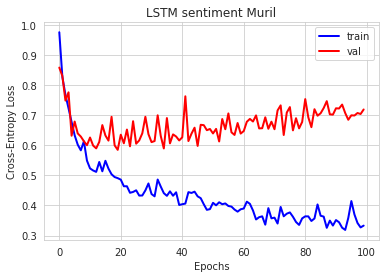

In [ ]:
#generate plots
plt.figure()
plt.plot(history.history['loss'], lw=2.0, color='b', label='train')
plt.plot(history.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('LSTM sentiment Muril')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()


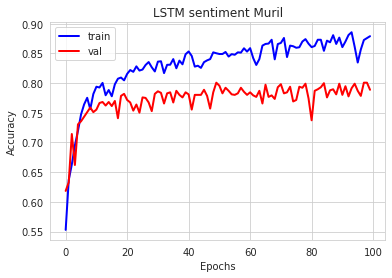

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(history.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title('LSTM sentiment Muril')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [93]:
LSTM_MU_accuracy, LSTM_MU_precision, LSTM_MU_recall,LSTM_MU_f1_score,y_pred  = evaluate_model(x_test_modified, y_testo, model)

In [ ]:
!pip install beautifultable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
h0=["Algorithm"]
h1=["LSTM",LSTM_MU_accuracy,LSTM_MU_f1_score,LSTM_MU_precision,LSTM_MU_recall]

h0.append("LSTM_MU_accuracy")
h0.append("LSTM_MU_F1 Measure")
h0.append("LSTM_MU_Precision")
h0.append("LSTM_MU_Recall")

from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers = h0
table.append_row(h1)
print(table)

+-----------+---------------+-------------------+----------------+-------------+
| Algorithm | LSTM_MU_accur | LSTM_MU_F1 Measur | LSTM_MU_Precis | LSTM_MU_Rec |
|           |      acy      |         e         |      ion       |     all     |
+-----------+---------------+-------------------+----------------+-------------+
|   LSTM    |     0.789     |       0.768       |     0.786      |    0.756    |
+-----------+---------------+-------------------+----------------+-------------+


/usr/local/lib/python3.7/dist-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


In [ ]:
y_traino.shape

(4667,)

In [ ]:
class_name = ['Negative','Neutral','Positive']
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_testo, y_pred_test, target_names=class_name, zero_division=0, digits=4))


              precision    recall  f1-score   support

    Negative     0.7992    0.6881    0.7395       295
     Neutral     0.7626    0.6975    0.7286       281
    Positive     0.7948    0.8820    0.8361       593

    accuracy                         0.7887      1169
   macro avg     0.7856    0.7559    0.7681      1169
weighted avg     0.7882    0.7887    0.7859      1169



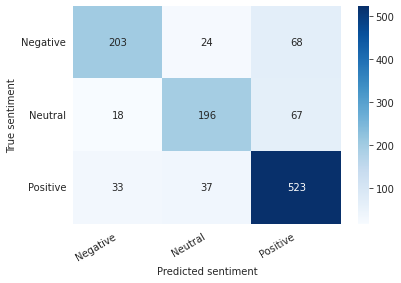

In [ ]:
cm = confusion_matrix(y_testo, y_pred_test)
df_cm = pd.DataFrame(cm, index=class_name, columns=class_name)
show_confusion_matrix(df_cm)

#MuRIL with LSTM -Stemming

In [ ]:
dataframe_stem = pd.read_csv('/content/drive/MyDrive/dataframe_stem1.csv')


In [ ]:
traindf, testdf = testtrainsplit(dataframe_stem)
X_train = traindf.iloc[:, :-1]
X_test = testdf.iloc[:, :-1]
y_train = traindf.sentiment
y_test = testdf.sentiment

In [ ]:
x_train = traindf.iloc[:, :-1].to_numpy()
x_test = testdf.iloc[:, :-1].to_numpy()
y_train = traindf.sentiment.to_numpy()
y_test = testdf.sentiment.to_numpy()

In [ ]:
encoder = LabelEncoder()
encoder.fit(list(y_train)+list(y_test))
y_traino = encoder.transform(y_train)
y_testo = encoder.transform(y_test)

In [ ]:
best_num_neurons1=512
best_num_neurons2=512
best_learning_rate=0.01

#y_train=training_label_seq
#y_test=testing_label_seq

encoder = LabelEncoder()
encoder.fit(list(y_train)+list(y_test))
#One hot encoding
y_train = np_utils.to_categorical(encoder.transform(y_train))
y_test  = np_utils.to_categorical(encoder.transform(y_test))

x_train_modified = x_train.reshape(x_train.shape[0],1,x_train.shape[1])
x_test_modified = x_test.reshape(x_test.shape[0],1,x_test.shape[1])

optimizer=tf.keras.optimizers.Adam(lr=best_learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)

model = Sequential()
model.add(CuDNNLSTM(best_num_neurons1, input_shape=(x_train_modified.shape[1],x_train_modified.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(CuDNNLSTM(best_num_neurons2))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

history=model.fit(x_train_modified, y_train, epochs=100, batch_size=128, validation_data=(x_test_modified,y_test))




/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm_2 (CuDNNLSTM)    (None, 1, 512)            3151872   
                                                                 
 dropout_2 (Dropout)         (None, 1, 512)            0         
                                                                 
 cu_dnnlstm_3 (CuDNNLSTM)    (None, 512)               2101248   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 5,254,659
Trainable params: 5,254,659
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
37/37 [=========================

Test accuracy

In [ ]:
y_prob=model.predict(x_test_modified)
y_pred_test = np.argmax(y_prob, axis=1)
print(classification_report(y_testo, y_pred_test))

37/37 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.70      0.81       295
           1       0.87      0.73      0.80       281
           2       0.81      0.98      0.89       593

    accuracy                           0.85      1169
   macro avg       0.88      0.80      0.83      1169
weighted avg       0.86      0.85      0.85      1169



Train accuracy

In [ ]:
y_prob=model.predict(x_train_modified)
y_pred_train = np.argmax(y_prob, axis=1)
print(classification_report(y_traino, y_pred_train))

146/146 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      1178
           1       0.99      0.79      0.88      1120
           2       0.83      1.00      0.91      2369

    accuracy                           0.89      4667
   macro avg       0.94      0.86      0.89      4667
weighted avg       0.91      0.89      0.89      4667



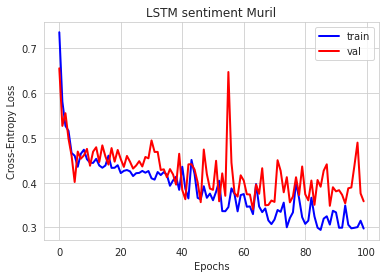

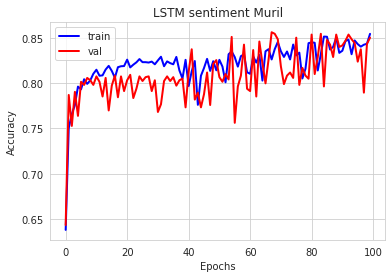

In [ ]:

#generate plots
plt.figure()
plt.plot(history.history['loss'], lw=2.0, color='b', label='train')
plt.plot(history.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('LSTM sentiment Muril')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(history.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title('LSTM sentiment Muril')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [ ]:
LSTM_MU_STM_accuracy, LSTM_MU_STM_precision, LSTM_MU_STM_recall,LSTM_MU_STM_f1_score,LSTM_MU_STM_y_pred  = evaluate_model(x_test_modified, y_testo, model)

In [ ]:
h0=["Algorithm"]
h1=["LSTM",LSTM_MU_STM_accuracy,LSTM_MU_STM_f1_score,LSTM_MU_STM_precision,LSTM_MU_STM_recall]

h0.append("LSTM_MU_STM_accuracy")
h0.append("LSTM_MU_STM_F1 Measure")
h0.append("LSTM_MU_STM_Precision")
h0.append("LSTM_MU_STM_Recall")

from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers = h0
table.append_row(h1)
print(table)

+-----------+---------------+----------------+------------------+--------------+
| Algorithm | LSTM_MU_STM_a | LSTM_MU_STM_F1 | LSTM_MU_STM_Prec | LSTM_MU_STM_ |
|           |    ccuracy    |     Measure    |      ision       |    Recall    |
+-----------+---------------+----------------+------------------+--------------+
|   LSTM    |     0.85      |     0.831      |      0.879       |    0.805     |
+-----------+---------------+----------------+------------------+--------------+


/usr/local/lib/python3.7/dist-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


In [ ]:
class_name = ['Negative','Neutral','Positive']
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_testo, y_pred_test, target_names=class_name, zero_division=0, digits=4))


              precision    recall  f1-score   support

    Negative     0.9539    0.7017    0.8086       295
     Neutral     0.8692    0.7331    0.7954       281
    Positive     0.8126    0.9798    0.8884       593

    accuracy                         0.8503      1169
   macro avg     0.8786    0.8049    0.8308      1169
weighted avg     0.8619    0.8503    0.8459      1169



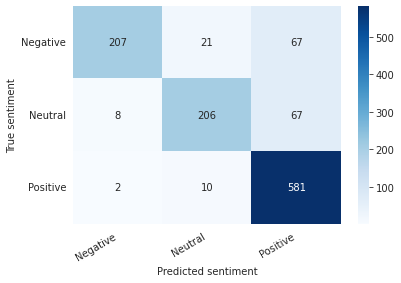

In [ ]:
cm = confusion_matrix(y_testo, y_pred_test)
df_cm = pd.DataFrame(cm, index=class_name, columns=class_name)
show_confusion_matrix(df_cm)

#SVM MuRIL

In [97]:
import string
import sys
import time
import json
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import random as rn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [98]:
dataframe = pd.read_csv('/content/drive/MyDrive/dataframe1.csv')

In [99]:
traindf, testdf = testtrainsplit(dataframe)
x_train = traindf.iloc[:, :-1]
x_test = testdf.iloc[:, :-1]
y_train = traindf.sentiment
y_test = testdf.sentiment

In [102]:
x_train = traindf.iloc[:, :-1].to_numpy()
x_test = testdf.iloc[:, :-1].to_numpy()
y_train = traindf.sentiment.to_numpy()
y_test = testdf.sentiment.to_numpy()

In [103]:
encoder = LabelEncoder()
encoder.fit(list(y_train)+list(y_test))
y_traino = encoder.transform(y_train)
y_testo = encoder.transform(y_test)

In [ ]:
np.unique(y_traino)

array([0, 1, 2])

In [ ]:
x_train.shape

(4667, 1025)

In [ ]:
y_traino.shape

(4667,)

In [104]:
from sklearn.svm import SVC

# model = SVC(kernel = 'poly',decision_function_shape='ovr', random_state = 0, C=1000)

model = SVC(kernel = 'rbf',decision_function_shape='ovr', random_state = 0, C=1000)

# model = SVC(kernel = 'linear',decision_function_shape='ovr', random_state = 0, C=10,probability=True)

In [105]:
model.fit(x_train, y_traino)
predicted_labels = model.predict(x_test)

In [106]:
accuracyscore=accuracy_score(y_testo, predicted_labels)

In [ ]:
accuracyscore

0.632164242942686

Accuracy score for MuRIL SVM model  0.632164242942686


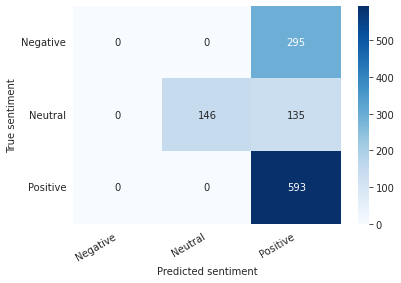

In [ ]:
accuracyscore=accuracy_score(y_testo, predicted_labels)
print("Accuracy score for MuRIL SVM model ",accuracyscore)
cm = confusion_matrix(y_testo, predicted_labels)
class_name = ['Negative','Neutral','Positive']
df_cm = pd.DataFrame(cm, index=class_name, columns=class_name)
show_confusion_matrix(df_cm)

In [107]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

def evaluate_model1(X_test, y_test, model):
    # compute probabilistic predictiond for the evaluation set
    # _probabilities = model.predict_proba(X_test)[:, 1]
    
    # compute exact predictiond for the evaluation set
    _predicted_values = model.predict(X_test)
        
    # compute accuracy
    _accuracy = accuracy_score(y_test, _predicted_values)
        
    # compute precision, recall and f1 score for class 1
    _precision, _recall, _f1_score, _ = precision_recall_fscore_support(y_test, _predicted_values, labels=[1])
    
    # # compute fpr and tpr values for various thresholds 
    # # by comparing the true target values to the predicted probabilities for class 1
    # _fpr, _tpr, _ = roc_auc_score(y_test, _probabilities,multi_class="ovr")
        
    # # compute true positive rates for the values in the array mean_fpr
    # _tpr_transformed = np.array([interp(mean_fpr, _fpr, _tpr)])
    
    # # compute the area under the curve
    # _auc = auc(_fpr, _tpr)
            
    return _accuracy, _precision[0], _recall[0], _f1_score[0]
    #, _tpr_transformed, _auc

In [ ]:

print("Length of predicted labels ",len(predicted_labels))
print (confusion_matrix(y_testo, predicted_labels))
print (classification_report(y_testo, predicted_labels, digits=4, target_names=class_name))


SVM_MU_accuracy, SVM_MU_precision, SVM_MU_recall ,SVM_MU_f1_score = evaluate_model1(x_test, y_testo, model)
h0=["Algorithm"]
h1=["SVM",SVM_MU_accuracy, SVM_MU_precision, SVM_MU_recall ,SVM_MU_f1_score]

h0.append("Accuracy")
h0.append("F1 Measure")
h0.append("Precision")
h0.append("Recall")

from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers = h0
table.append_row(h1)
print(table)

Length of predicted labels  1169
[[  0   0 295]
 [  0 146 135]
 [  0   0 593]]
              precision    recall  f1-score   support

    Negative     0.0000    0.0000    0.0000       295
     Neutral     1.0000    0.5196    0.6838       281
    Positive     0.5797    1.0000    0.7339       593

    accuracy                         0.6322      1169
   macro avg     0.5266    0.5065    0.4726      1169
weighted avg     0.5344    0.6322    0.5367      1169



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


+-----------+----------+------------+-----------+--------+
| Algorithm | Accuracy | F1 Measure | Precision | Recall |
+-----------+----------+------------+-----------+--------+
|    SVM    |  0.632   |    1.0     |   0.52    | 0.684  |
+-----------+----------+------------+-----------+--------+


/usr/local/lib/python3.7/dist-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


#SVM with MuRIL stemming

In [ ]:
dataframe_stem = pd.read_csv('/content/drive/MyDrive/dataframe_stem1.csv')


In [ ]:
traindf, testdf = testtrainsplit(dataframe_stem)
x_train = traindf.iloc[:, :-1]
x_test = testdf.iloc[:, :-1]
y_train = traindf.sentiment
y_test = testdf.sentiment

x_train = traindf.iloc[:, :-1].to_numpy()
x_test = testdf.iloc[:, :-1].to_numpy()
y_train = traindf.sentiment.to_numpy()
y_test = testdf.sentiment.to_numpy()

encoder = LabelEncoder()
encoder.fit(list(y_train)+list(y_test))
y_traino = encoder.transform(y_train)
y_testo = encoder.transform(y_test)

In [ ]:
from sklearn.svm import SVC

# model = SVC(kernel = 'poly',decision_function_shape='ovr', random_state = 0, C=1000)

model = SVC(kernel = 'rbf',decision_function_shape='ovr', random_state = 0, C=1000)

# model = SVC(kernel = 'linear',decision_function_shape='ovr', random_state = 0, C=10,probability=True)

In [ ]:
model.fit(x_train, y_traino)
predicted_labels = model.predict(x_test)
accuracyscore=accuracy_score(y_testo, predicted_labels)

In [ ]:
predicted_labels = model.predict(x_train)

In [ ]:
accuracyscore=accuracy_score(y_testo, predicted_labels)

In [ ]:
accuracyscore

0.9940119760479041

Accuracy score for MuRIL SVM model  0.9940119760479041


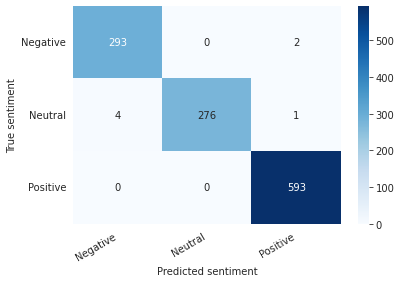

In [ ]:
accuracyscore=accuracy_score(y_testo, predicted_labels)
print("Accuracy score for MuRIL SVM model ",accuracyscore)
cm = confusion_matrix(y_testo, predicted_labels)
class_name = ['Negative','Neutral','Positive']
df_cm = pd.DataFrame(cm, index=class_name, columns=class_name)
show_confusion_matrix(df_cm)

In [ ]:

print("Length of predicted labels ",len(predicted_labels))
print (confusion_matrix(y_testo, predicted_labels))
print (classification_report(y_testo, predicted_labels, digits=4, target_names=class_name))


SVM_MU_stem_accuracy, SVM_MU_stem_precision, SVM_MU_stem_recall ,SVM_MU_stem_f1_score = evaluate_model1(x_test, y_testo, model)
h0=["Algorithm"]
h1=["SVM",SVM_MU_stem_accuracy, SVM_MU_stem_precision, SVM_MU_stem_recall ,SVM_MU_stem_f1_score]

h0.append("Accuracy")
h0.append("F1 Measure")
h0.append("Precision")
h0.append("Recall")

from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers = h0
table.append_row(h1)
print(table)

Length of predicted labels  1169
[[293   0   2]
 [  4 276   1]
 [  0   0 593]]
              precision    recall  f1-score   support

    Negative     0.9865    0.9932    0.9899       295
     Neutral     1.0000    0.9822    0.9910       281
    Positive     0.9950    1.0000    0.9975       593

    accuracy                         0.9940      1169
   macro avg     0.9938    0.9918    0.9928      1169
weighted avg     0.9940    0.9940    0.9940      1169

+-----------+----------+------------+-----------+--------+
| Algorithm | Accuracy | F1 Measure | Precision | Recall |
+-----------+----------+------------+-----------+--------+
|    SVM    |  0.994   |    1.0     |   0.982   | 0.991  |
+-----------+----------+------------+-----------+--------+


/usr/local/lib/python3.7/dist-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


Experiment 2 Results

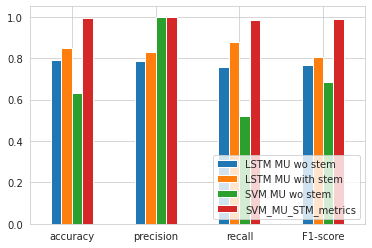

In [ ]:
LSTM_MU_metrics = np.array([LSTM_MU_accuracy, LSTM_MU_precision, LSTM_MU_recall,LSTM_MU_f1_score])
LSTM_MU_STM_metrics = np.array([LSTM_MU_STM_accuracy,LSTM_MU_STM_f1_score,LSTM_MU_STM_precision,LSTM_MU_STM_recall])
SVM_MU_metrics = np.array([SVM_MU_accuracy, SVM_MU_precision, SVM_MU_recall ,SVM_MU_f1_score])
SVM_MU_STM_metrics = np.array([SVM_MU_stem_accuracy, SVM_MU_stem_precision, SVM_MU_stem_recall ,SVM_MU_stem_f1_score])
index = ['accuracy', 'precision', 'recall', 'F1-score']
df_metrics_mu = pd.DataFrame({'LSTM MU wo stem': LSTM_MU_metrics, 'LSTM MU with stem': LSTM_MU_STM_metrics, 'SVM MU wo stem': SVM_MU_metrics, 'SVM_MU_STM_metrics': SVM_MU_STM_metrics }, index=index)
df_metrics_mu.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()